# 4. Clustering With K-means

비지도학습 알고리즘 : 타겟값 없이 데이터의 특성을 어떤 구조로 나타내는 방법임

- `군집Clustering` : 인접한 데이터들을 같은 그룹에 넣는 것
    - 특성 공학에서는 소비자 군 분류, 비슷한 패턴을 같는 지정학적 영역 분류 등이 있다
    - **군집 label을 피쳐로 추가하는 건 차원의 복잡함을 해소하는 데 도움이 된다**

# 피쳐로서의 클러스터 label

- 단일 연속값 특성에 대해 클러스터링은 binning이나 discretization 변환처럼 작동한다. 
- 여러 연속값 특성에 대해서는, `다차원 binning` (`Vector Quantization`이라고도 함)

![3](Images/3.png)
- 왼쪽 : 단일 변수 클러스터링 / 오른쪽 : 이변수 클러스터링

- 클러스터링 결과는 `Categorical`이다. 
- 이 상태로 `LabelEncoding`처럼 활용해도 되고, 일부 모델에서는 `One Hot Encoding`이 더 좋기도 하다.
    - (경험상) 트리 모델에서는 `OneHotEncoding`을 쓰는 걸 추천하지 않음 : 차원이 늘어나는 것에 비해 눈에 띄는 성능 향상을 기대하기 어렵기 때문

- 클러스터링 label을 추가하는 아이디어는, **복잡한 피쳐간의 관계를 단순한 청크로 묶는다**에 있음. 
    - 따라서 코테 등에 흔히 나오는 "Divide and Conquer" 전략으로 볼 수도 있음 : 복잡한 것을 한번에 처리하는 대신, 단순한 청크로 나눴기 때문
    
 

![4](Images/4.png)
- 클러스터링은 선형 모델의 성능 향상을 가져옴 : 산점도의 관계는 곡선이므로 기본적으로 UnderFit이 일어남
- 이를 청크로 나누면 훨씬 선형적인 관계를 가져올 수 있다.

# K-Means Clustering

- `Clustering`에는 다양한 알고리즘이 있음. "유사성", "인접도"를 어떻게 측정하는가에 대한 차이만 있음
- `K-Means Clustering`은 직관적이고 특성 공학에서 적용하기도 쉬움. 
    - `KMC`는 유사성을 유클리드 거리로 측정함
    - 각 클러스터는 `Centroid`라고 하는 군집의 중심점이 있으며, 처음에 이를 k개 생성함
    - 각 군집의 중심점이 퍼져나가다가 다른 군집의 중심점과 경쟁하는 데이터 포인트들이 생기며, 이를 `Voronoi Tessallation`이라고 한다.
        - `Voronoi Tessallation`은 어떤 데이터가 할당될지를 보여줌
    

![5](Images/5.jfif)
- x는 각 군집의 중심선, 경계선이 `Voronoi Tessallation`이다.
- KMC는 `Voronoi Tessallation`을 학습하는 것임

어떻게 KMC가 학습하고, 이것들이 특성 공학에서 무엇을 의미하는지를 살펴보자. 사이킷런에 명시된 것을 따른다.  
크게 2개의 과정을 거친다.
1. `n_clusters`, 즉 k개의 초기 `중심점`을 정한다.
2. 각 점(데이터)을 근처의 `중심점` 중 가장 가까운 중심점의 클러스터에 할당한다.
3. `중심점`의 위치를 같은 군집에 할당된 모든 점과의 거리의 합을 최소화하는 지점으로 옮긴다.  
* 이후 2, 3을 중심점이 옮겨지지 않을 때까지 반복한다.
- `max_iter` : 최대 반복 횟수를 제한할 수 있다.
- `n_init` : 알고리즘 전체의 반복 횟수를 정할 수 있다.
    - `중심점`의 초기 위치에 따라 알고리즘의 성능에 차이가 있을 수 있어서, 가장 좋은 클러스터를 찾기 위해 전체 알고리즘을 반복하는 횟수를 정할 수 있다.

![6](Images/6.gif)
- 군집의 결과는 **초기 중심점의 위치** 및 **수렴까지의 반복 횟수**와 관계가 있음을 알 수 있다.
- 복잡한 데이터셋이나 많은 군집을 위해 `max_iter`나 `n_init`을 늘릴 필요가 있을 수 있다.
- **일반적으로 조절해야 하는 유일한 값은 `n_clusters`(즉 k값)인 경우가 많으며, 최적의 값은 수행하는 과제에 따라 다르므로 `Cross-Validation` 등 하이퍼파라미터 튜닝으로 찾자.**

## 예제 : California Housing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large', titleweight = 'bold', titlesize = 14, titlepad = 10)

df = pd.read_csv('data/housing.csv')
X = df.loc[:, ['MedInc', 'Latitude', 'Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


- K-Means는 스케일링에 예민하다. 따라서 정규화나 리스케일링이 필요하며 이 예제는 그냥 진행해도 됨

In [3]:
kmeans = KMeans(n_clusters = 6)
X['Cluster'] = kmeans.fit_predict(X) # fit_predict는 어떤 군집에 속하는지만 넣어줌(LabelEncoding과 유사)
# fit_transform()도 있다 : 각 데이터에서 군집중심점까지의 거리를 나타냄

X['Cluster'] = X['Cluster'].astype('category')

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,5


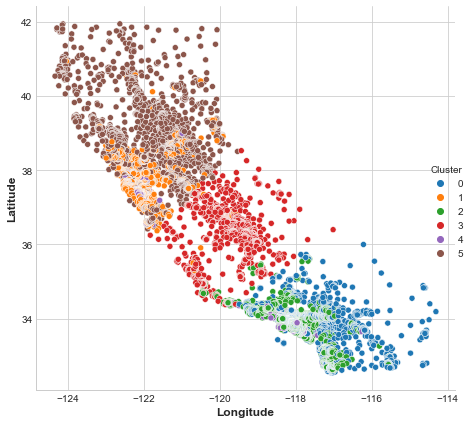

In [5]:
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'Cluster', data = X, height = 6)

- `MedHouseVal` : 집값의 중위값
- 우리가 나눈 클러스터링이 의미가 있는 지 보려면 각 클러스터에 대한 중위값을 살펴볼 수 있을 것이다

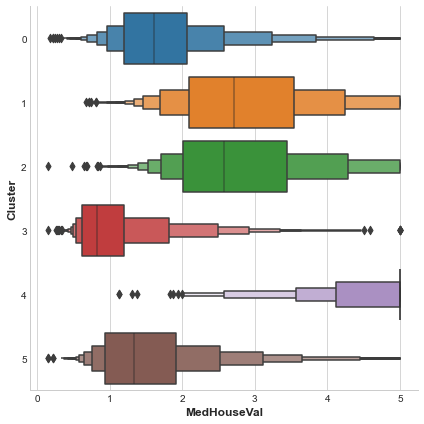

In [6]:
X['MedHouseVal'] = df['MedHouseVal']

sns.catplot(x = 'MedHouseVal', y = "Cluster", data = X, kind = 'boxen' , height = 6)

## 문제 풀이 중 도움이 될만한 것


- K-Means는 스케일링에 매우 민감하다 : 따라서 스케일링을 할 때 매우 신중해야 한다.
    - 키, 몸무게 등 직접적으로 비교할 수 없는 기능은 스케일링을 할 필요가 있겠죠?
    - 그러나 어떤 게 정답이라고 말하기 불분명한 경우도 존재할 것이다
    - 이런 경우에는 **큰 값은 더 많은 가중치가 적용된다** 라는 상식으로 접근하자

- 질문 : 스케일링을 하는 게 좋다? 안해도 된다? 둘 다 합리적이다?
1. 경위도 데이터
2. `Lot Area` and `Living Area`
3. 문 갯수와 차의 마력

- 내 답변
1. 안 해도 됨
2. 이 값들이 나타내는 차이가 크다면 해야 함
3. 굳이 해야 하나?

- 강의에서의 답변
1. 하면 안됨 : **리스케일링은 경위도로 표현된 거리값을 왜곡함**
2. 둘 다 합리적이나, 일반적으로 생각했을 때 `LivingArea`가 지니는 가치가 훨씬 크기 때문에, `Lot Area`가 `SalePrice`에 미치는 영향이 커지지 않도록 리스케일링을 하는 게 좋음
3. **해야 함**. 문 갯수는 1자리 수인데 비해 마력은 백 단위이므로 그대로 냅둔다면 문 갯수는 무시해도 되는 수치가 됨